# Worksheet 21

Name:  Huanjia Liang
UID: U62794192

### Topics

- Logistic Regression

## Logistic Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

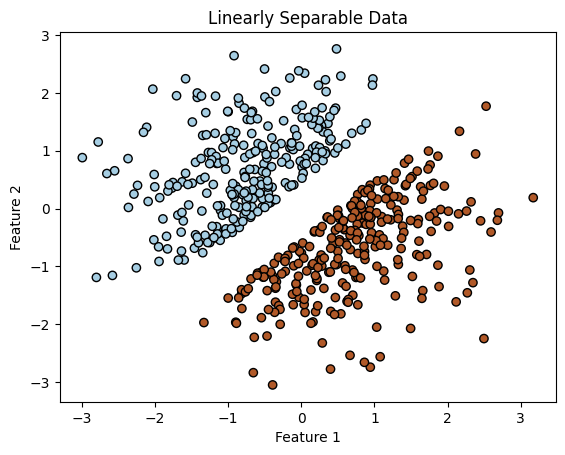

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x: x[0] - x[1] < -0.5 or x[0] - x[1] > 0.5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# Generate linearly separable data
X_line, Y_line = generate_line_data()

# Plot the linearly separable data
plt.scatter(X_line[:, 0], X_line[:, 1], c=Y_line, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# LINE
def generate_line_data():
    np.random.seed(0)
    X = np.random.rand(100, 2)
    Y = (X[:, 0] + X[:, 1] > 1).astype(int)
    return X, Y

# Generate linearly separable data
X_line, Y_line = generate_line_data()

# Fit logistic regression model
model = LogisticRegression().fit(X_line, Y_line)

# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[2.78183198 3.52298989]]
Intercept: [-3.04351952]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

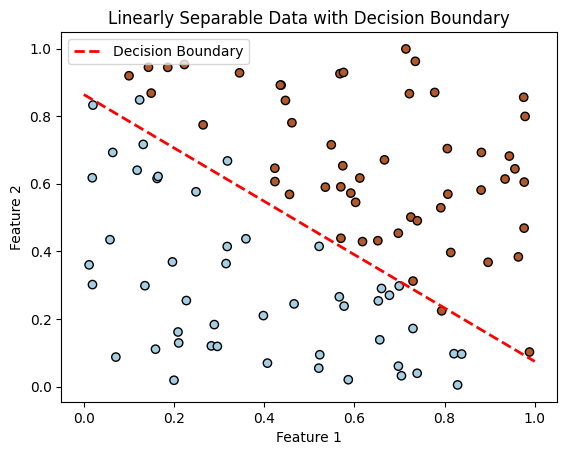

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# LINE
def generate_line_data():
    np.random.seed(0)
    X = np.random.rand(100, 2)
    Y = (X[:, 0] + X[:, 1] > 1).astype(int)
    return X, Y

# Generate linearly separable data
X_line, Y_line = generate_line_data()

# Fit logistic regression model
model = LogisticRegression().fit(X_line, Y_line)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Plot the scatter plot
plt.scatter(X_line[:, 0], X_line[:, 1], c=Y_line, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary
x_values = np.linspace(0, 1, 100)
y_values = (-intercept - coefficients[0, 0] * x_values) / coefficients[0, 1]
plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

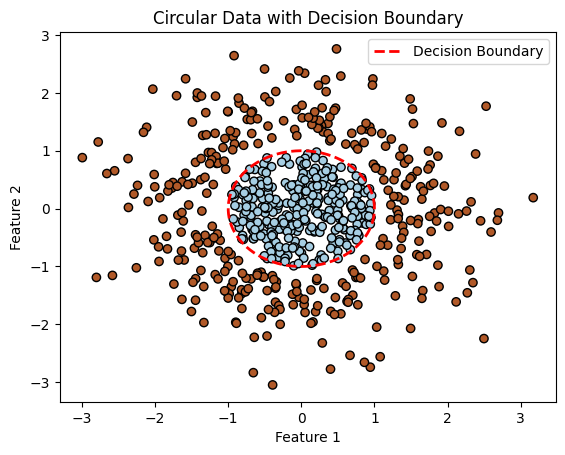

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# CIRCLE
def generate_circle_data():
    np.random.seed(0)
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate circular data
X_circle, Y_circle = generate_circle_data()

# Fit logistic regression model
model = LogisticRegression().fit(X_circle, Y_circle)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Plot the scatter plot
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary
theta = np.linspace(0, 2*np.pi, 100)
x_values = np.cos(theta)
y_values = np.sin(theta)

plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.title('Circular Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

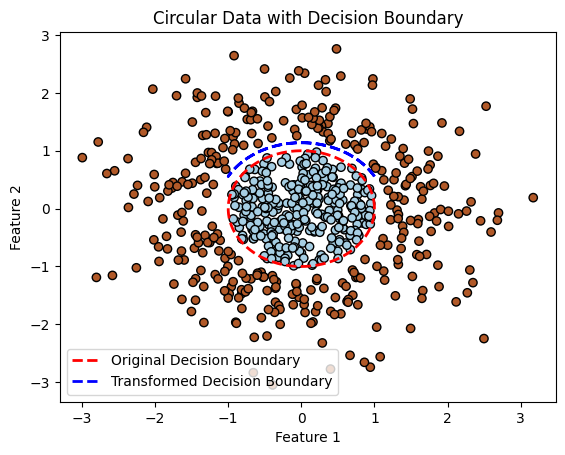

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# CIRCLE
def generate_circle_data():
    np.random.seed(0)
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate circular data
X_circle, Y_circle = generate_circle_data()

# Feature transformation: z = ax^2 + by^2
X_transformed = np.column_stack([X_circle[:, 0]**2, X_circle[:, 1]**2])

# Fit logistic regression model to the transformed data
model = LogisticRegression().fit(X_transformed, Y_circle)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Plot the scatter plot
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap=plt.cm.Paired, edgecolors='k')

# Plot the original decision boundary
theta = np.linspace(0, 2*np.pi, 100)
x_values = np.cos(theta)
y_values = np.sin(theta)

plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=2, label='Original Decision Boundary')

# Plot the transformed decision boundary
z_values = -(intercept + coefficients[0, 0] * x_values**2) / coefficients[0, 1]
plt.plot(x_values, np.sqrt(z_values), color='blue', linestyle='dashed', linewidth=2, label='Transformed Decision Boundary')

plt.title('Circular Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


f) Plot the decision boundary using the code below.

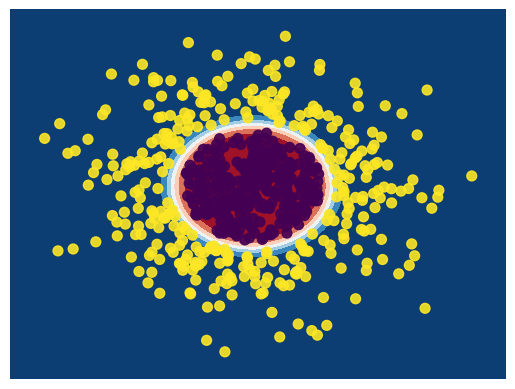

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# CIRCLE
def generate_circle_data():
    np.random.seed(0)
    centers = [[0, 0]]
    t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate circular data
X_circle, Y_circle = generate_circle_data()

# Feature transformation: z = ax^2 + by^2
X_transformed = np.column_stack([X_circle[:, 0]**2, X_circle[:, 1]**2])

# Fit logistic regression model to the transformed data
model = LogisticRegression().fit(X_transformed, Y_circle)

# Plot the decision boundary and training points
h = 0.02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + .5
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel()**2, yy.ravel()**2]  # Apply the same transformation to mesh data

fig, ax = plt.subplots()
A = model.predict_proba(mesh_data)[:, 1].reshape(xx.shape)
Z = model.predict(mesh_data).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot the training points
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, alpha=0.9)

plt.show()


g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

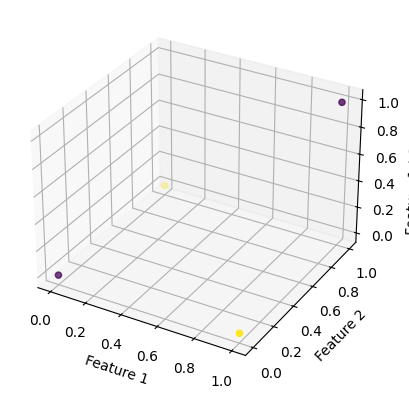

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# XOR
def generate_xor_data():
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

# Generate XOR data
X_xor, Y_xor = generate_xor_data()

# Introduce a new feature x3 = x1 * x2
X_3d = np.column_stack([X_xor[:, 0], X_xor[:, 1], X_xor[:, 0] * X_xor[:, 1]])

# Plot the new dataset in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Y_xor)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 1 * Feature 2')

plt.show()


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

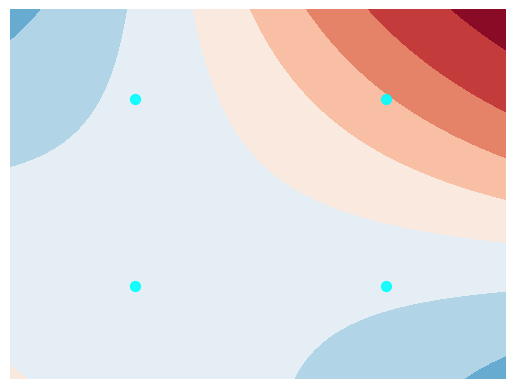

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# XOR
def generate_xor_data():
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
    Y = np.array([x[0] ^ x[1] for x in X])
    return X, Y

# Generate XOR data
X_xor, Y_xor = generate_xor_data()

# Introduce a new feature x3 = x1 * x2
X_3d = np.column_stack([X_xor[:, 0], X_xor[:, 1], X_xor[:, 0] * X_xor[:, 1]])

# Apply logistic regression model with interaction term
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X_3d, Y_xor)

# Plot the decision boundary and training points
h = 0.02  # step size in the mesh
x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + .5
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel()]  # Apply the same transformation to mesh data

fig, ax = plt.subplots()
A = model.predict_proba(mesh_data)[:, 1].reshape(xx.shape)
Z = model.predict(mesh_data).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot the training points
ax.scatter(X_xor[:, 0], X_xor[:, 1], color=Y_xor, s=50, alpha=0.9)

plt.show()


In [23]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'ipympl'

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

 This problem is unconstrained.
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


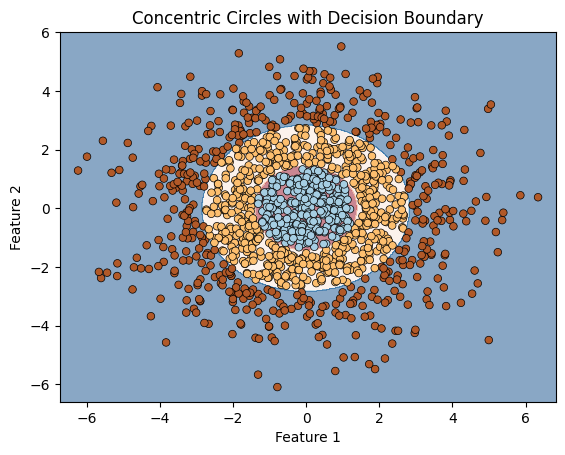

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import datasets

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0

    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

# Generate concentric circles data
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)
X, Y = generate_circles_data(t)

# Apply logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# Plot the decision boundary and training points
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel()]  # No need for polynomial features on mesh data

fig, ax = plt.subplots()
A = model.predict(mesh_data).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=2, alpha=0.5)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired, edgecolors='k', linewidth=0.5)

plt.title('Concentric Circles with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
